In [1]:
# https://www.kaggle.com/code/mihirpaghdal/ibm-hr-analysis

import numpy as np
import pandas as pd #
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
# import imblearn_test as imblearn

# sns.set_style('darkgrid')
%matplotlib inline

C:\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# ! pip install imblearn

set max views

In [3]:
pd.options.display.max_columns=25
pd.options.display.max_rows=100

get data

In [4]:
file = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'

df = pd.read_csv(file)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,...,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,...,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,...,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,...,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,...,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
df.select_dtypes(include="number")

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,...,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,...,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,...,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,...,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,...,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,...,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,1,9991,...,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,...,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,...,14,3,4,80,0,17,3,2,9,6,0,8


## Understanding data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.shape

(1470, 35)

In [8]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# num_cols
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
# cat_cols

In [9]:
df[num_cols].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,...,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,...,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,...,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,...,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,...,12,3,4,80,1,6,3,3,2,2,2,2


In [10]:
df[cat_cols].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [11]:
missing_counts = df[num_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Series([], dtype: int64)

In [12]:
missing_counts = df[cat_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Series([], dtype: int64)

In [13]:
df[num_cols].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [15]:
colors = sns.color_palette('pastel')[0:2]

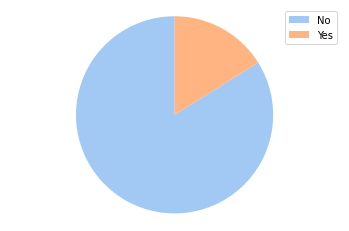

In [16]:
r = df.groupby('Attrition')['Attrition'].count()
# plt.pie(r, labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%', shadow=True, colors = colors, explode=[0.1, 0.05])
patches, texts = plt.pie(r, colors=colors, startangle=90)
plt.legend(patches, ['No', 'Yes'], loc="best")
plt.axis('equal')
# plt.tight_layout()
plt.show()

In [17]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [18]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [19]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [20]:
df["Over18"].value_counts()

Y    1470
Name: Over18, dtype: int64

In [21]:
df.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,...,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,...,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,...,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,...,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,...,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,...,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,...,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,...,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,...,14,3,4,80,0,17,3,2,9,6,0,8


In [22]:
df = df.drop(columns = ['StandardHours',
                    'EmployeeCount',
                    'Over18'
                    ])

<AxesSubplot:xlabel='Age', ylabel='Density'>

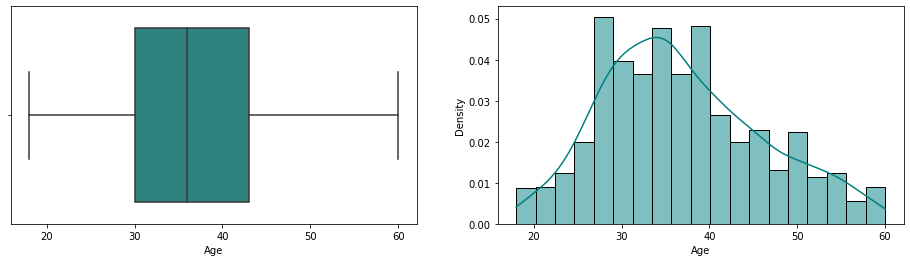

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
sns.boxplot(ax = axes[0], palette="viridis", x = df['Age'])
sns.histplot(ax = axes[1], color="teal", x = df['Age'], kde=True, stat="density")

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

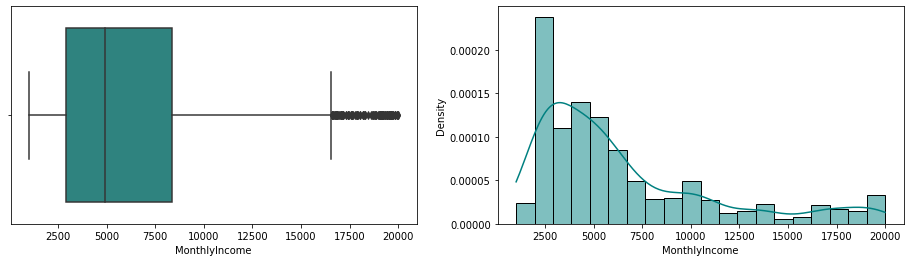

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
sns.boxplot(ax = axes[0], palette="viridis", x = df['MonthlyIncome'])
sns.histplot(ax = axes[1], color="teal", x = df['MonthlyIncome'], kde=True, stat="density")

In [25]:
len(df[df['MonthlyIncome']>17500])

81

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

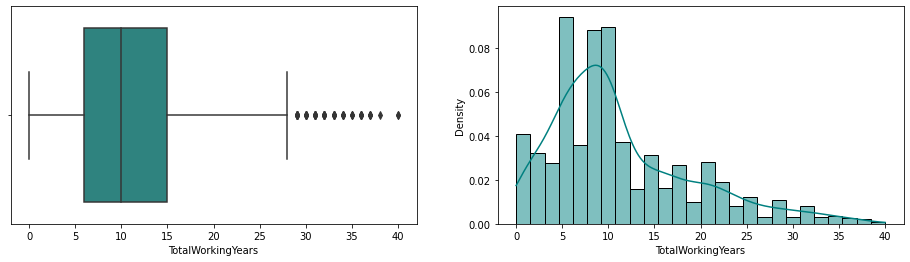

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
sns.boxplot(ax = axes[0], palette="viridis", x = df['TotalWorkingYears'])
sns.histplot(ax = axes[1], color="teal", x = df['TotalWorkingYears'], kde=True, stat="density")

In [27]:
len(df[df['TotalWorkingYears'] > 28])

63

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

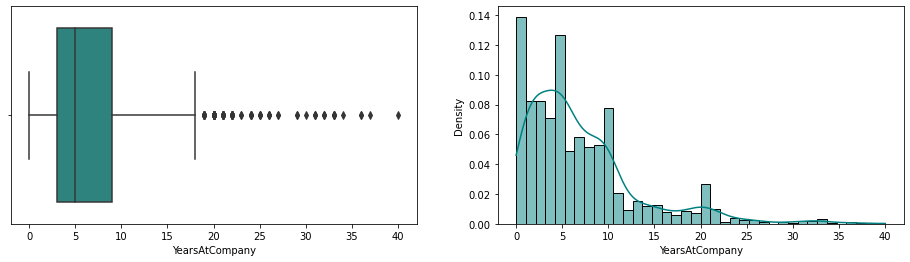

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
sns.boxplot(ax = axes[0], palette="viridis", x = df['YearsAtCompany'])
sns.histplot(ax = axes[1], color="teal", x = df['YearsAtCompany'], kde=True, stat="density")

In [29]:
len(df[df['YearsAtCompany'] > 18])

104

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

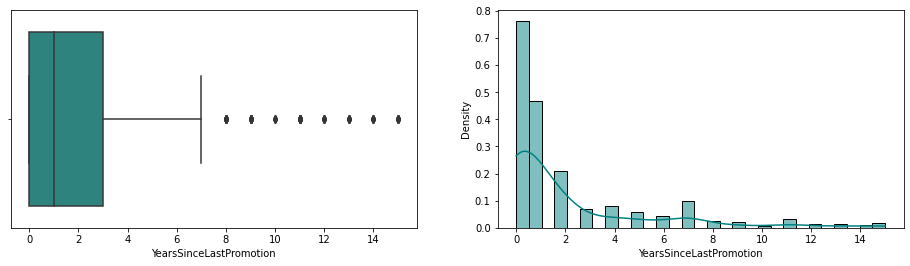

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
sns.boxplot(ax = axes[0], palette="viridis", x = df['YearsSinceLastPromotion'])
sns.histplot(ax = axes[1], color="teal", x = df['YearsSinceLastPromotion'], kde=True, stat="density")

In [31]:
len(df[df['YearsSinceLastPromotion'] > 7])

107

In [32]:
df_lastpromo = df[df['YearsSinceLastPromotion']<7]

In [33]:
len(df_lastpromo)

1287

<AxesSubplot:>

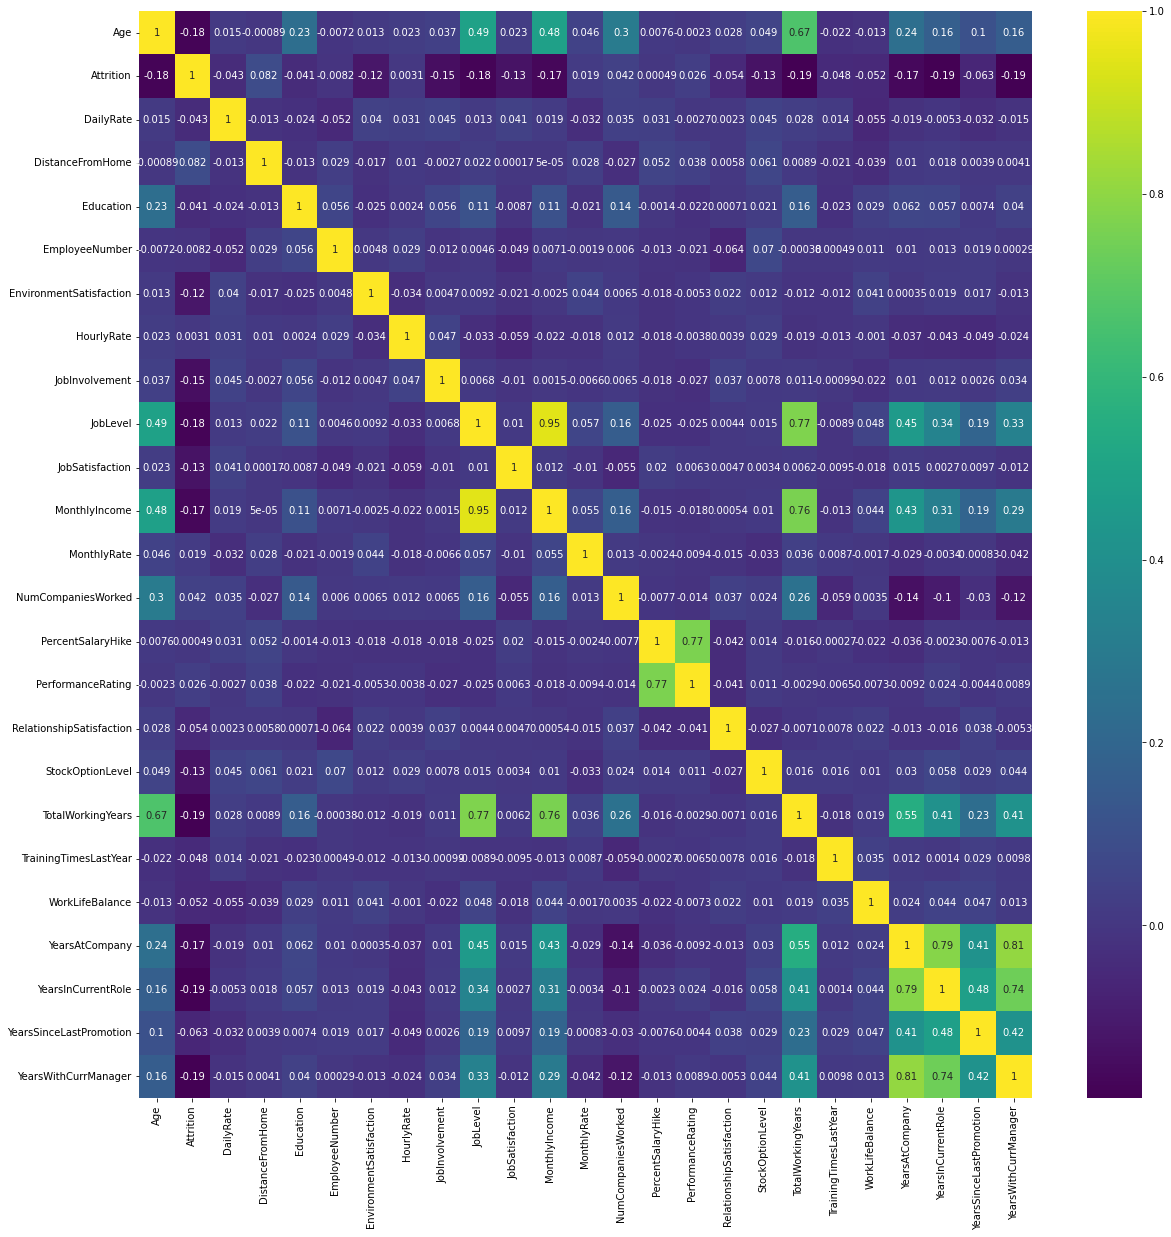

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(df_lastpromo.corr(), annot=True, cmap="viridis")

<AxesSubplot:>

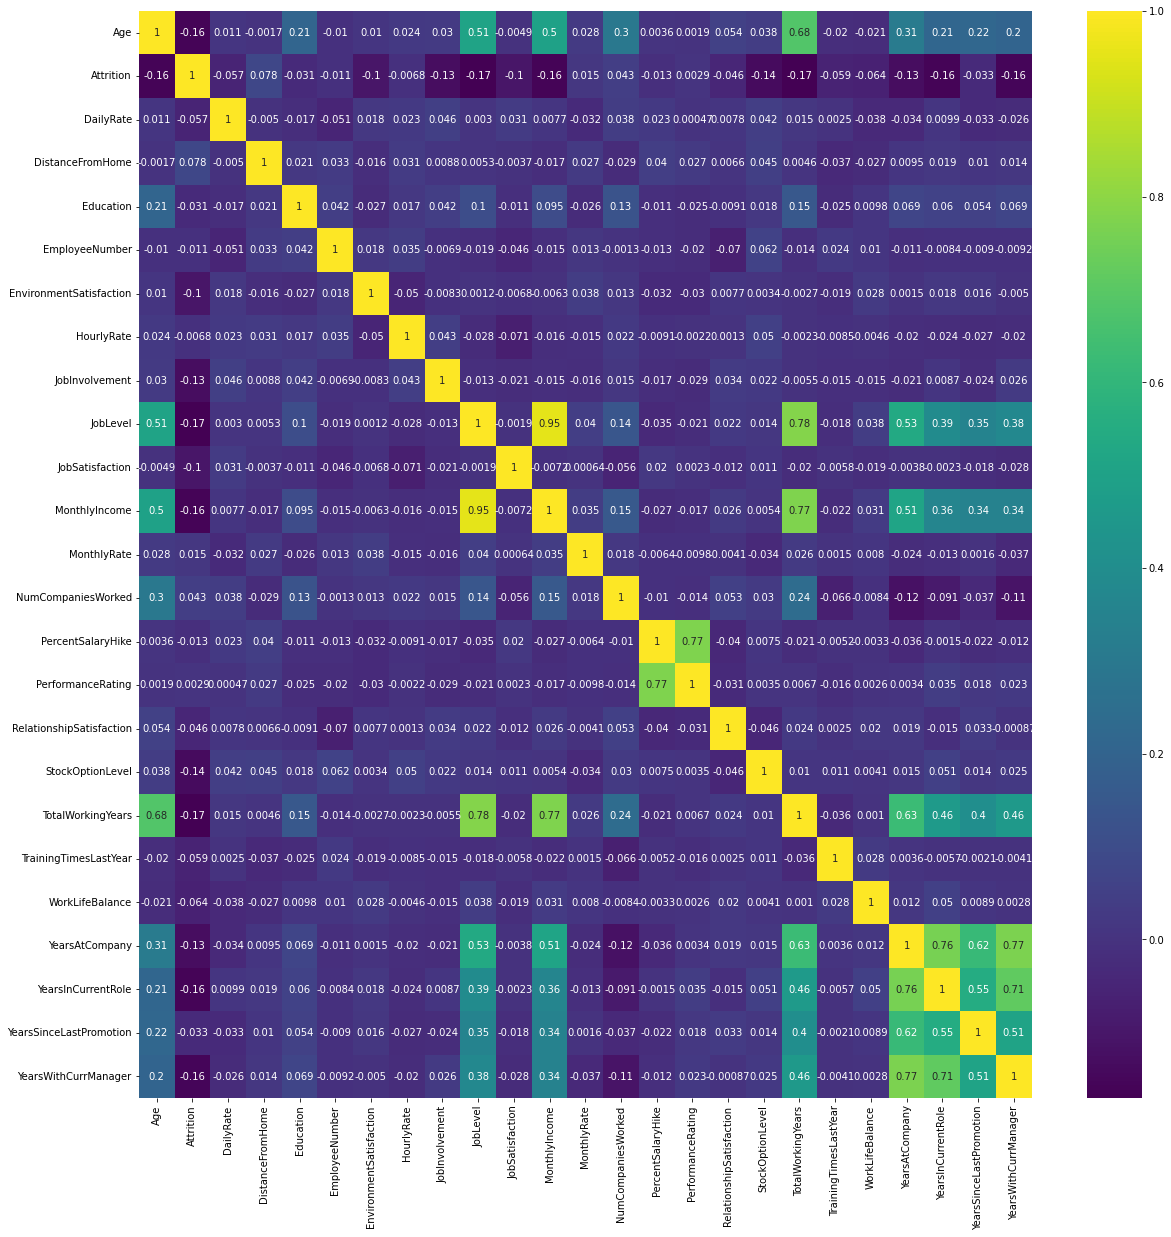

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="viridis")

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

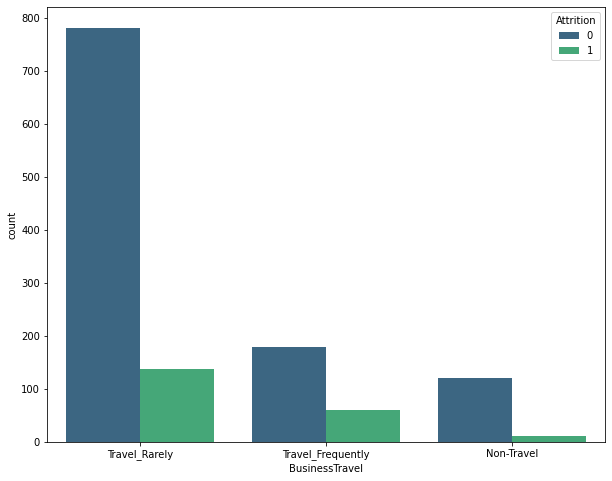

In [36]:
plt.figure(figsize=(10,8))
sns.countplot(x='BusinessTravel', palette="viridis", hue='Attrition', data=df_lastpromo)

<AxesSubplot:xlabel='Department', ylabel='count'>

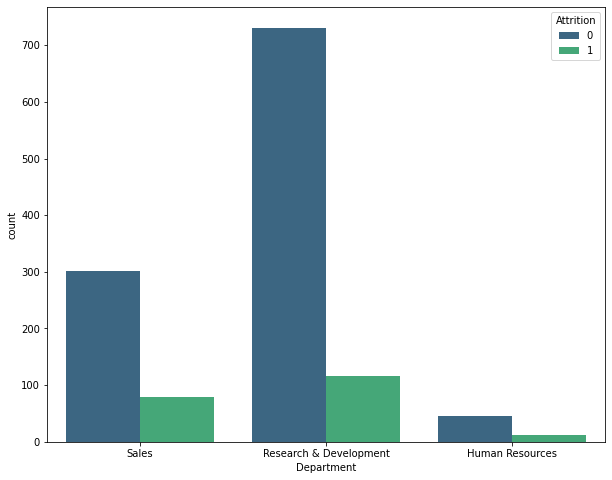

In [37]:
plt.figure(figsize=(10,8))

sns.countplot(x='Department', palette="viridis", hue='Attrition', data=df_lastpromo)

<AxesSubplot:xlabel='EducationField', ylabel='count'>

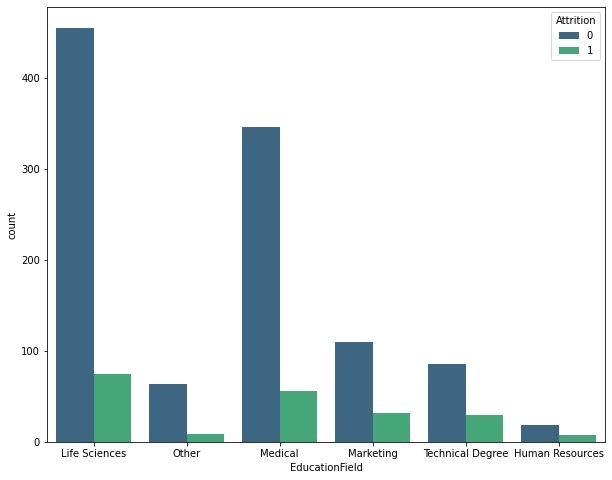

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(x='EducationField', palette="viridis", hue='Attrition', data=df_lastpromo)

<AxesSubplot:xlabel='Gender', ylabel='count'>

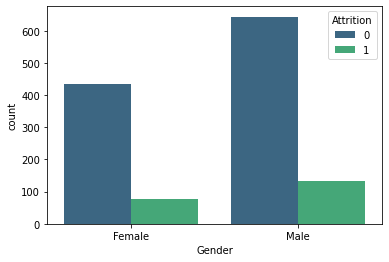

In [39]:
sns.countplot(x='Gender', palette="viridis", hue='Attrition', data=df_lastpromo)

<AxesSubplot:xlabel='JobRole', ylabel='count'>

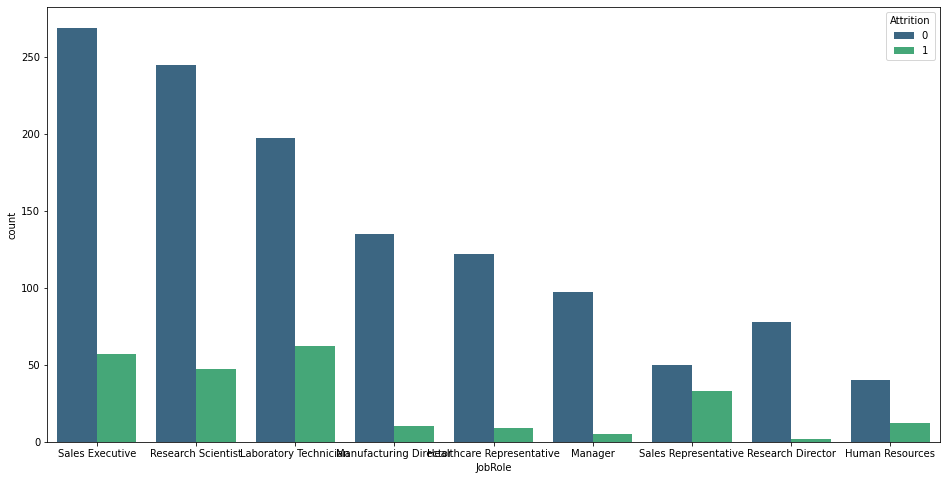

In [40]:
plt.figure(figsize=(16,8))
sns.countplot(x='JobRole', hue='Attrition', palette = "viridis", data=df)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

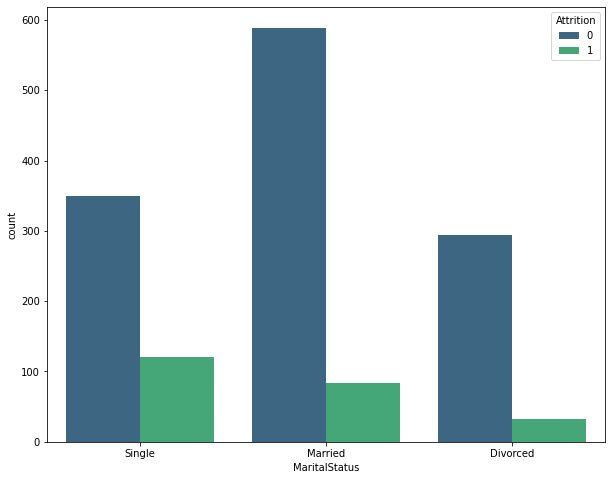

In [41]:
plt.figure(figsize=(10,8))
sns.countplot(x='MaritalStatus', hue='Attrition', palette = "viridis", data=df)

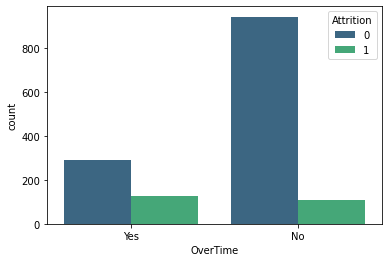

In [42]:
sns.countplot(x='OverTime', hue='Attrition', palette = "viridis", data=df);

## Prepare for modeling and analysis

In [43]:
# prepare/assign numerical values to categorical
df["Attrition"] = LabelEncoder().fit_transform(df['Attrition'])
df["BusinessTravel"] = LabelEncoder().fit_transform(df['BusinessTravel'])
df["Department"] = LabelEncoder().fit_transform(df['Department'])
df["EducationField"] = LabelEncoder().fit_transform(df['EducationField'])
df["Gender"] = LabelEncoder().fit_transform(df['Gender'])
df["JobRole"] = LabelEncoder().fit_transform(df['JobRole'])
df["MaritalStatus"] = LabelEncoder().fit_transform(df['MaritalStatus'])
df["OverTime"] = LabelEncoder().fit_transform(df['OverTime'])

In [44]:
# df["MaritalStatus"]

In [45]:
num_cols.remove('StandardHours')
num_cols.remove('EmployeeCount')
df[num_cols] = MinMaxScaler().fit_transform(df[num_cols])

In [46]:
df[num_cols].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,0.715820,0.000000,0.25,0.000000,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,0.000000,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.126700,0.250000,0.00,0.000484,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.857143,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,0.909807,0.035714,0.25,0.001451,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,0.285714,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.923407,0.071429,0.75,0.001935,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,0.000000,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,0.350036,0.035714,0.00,0.002903,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.071429,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [47]:
from imblearn.over_sampling import SMOTE

cols = list(df.columns)
cols.remove("Attrition")
sampled,target = SMOTE().fit_resample(df[cols],df["Attrition"])

In [48]:
X_train, X_test ,Y_train, Y_test = train_test_split(sampled[cols], target, test_size = 0.3, shuffle=True)

## Visualize and draw conclusions

Train Accuracy : 0.76 %
Test Accuracy : 0.72 %


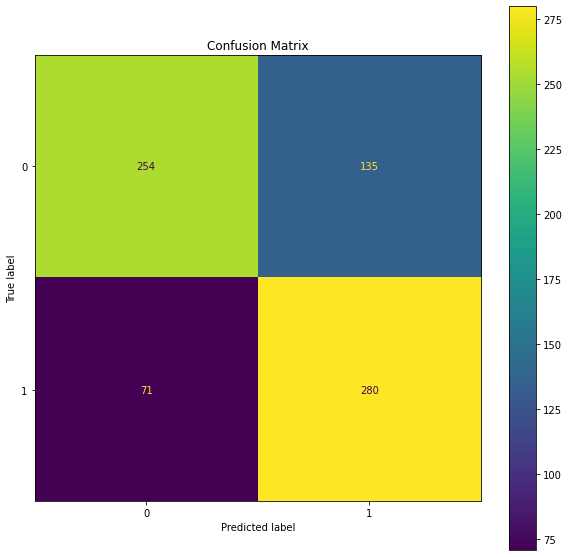

In [50]:
logistic_model = LogisticRegression(solver='liblinear',random_state=0).fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,logistic_model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

Train Accuracy : 1.00 %
Test Accuracy : 0.92 %


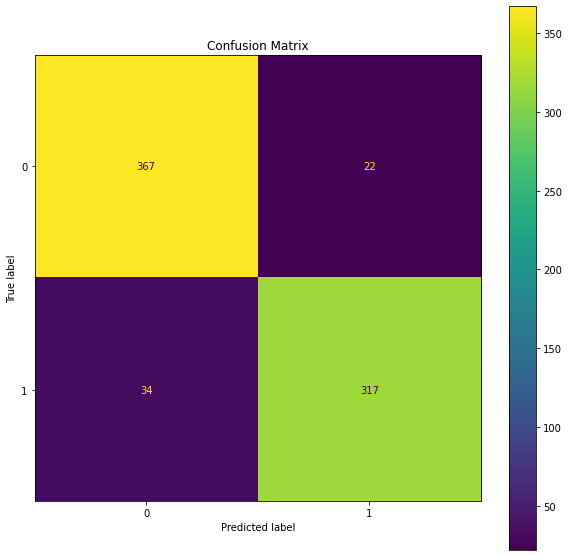

In [51]:
random_forest = RandomForestClassifier(n_estimators=590,
                                       random_state=0).fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,random_forest.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()